<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Tree-based Methods

### Author: Gloria Rivas

##**Formulation Analysis**
----
Let´s compare local RSS minimization, RSS gain maximization, and total RSS minimization in detail.

- The first question we will answer is: **Are local RSS minimization and RSS gain maximization equivalent?**

1. Local RSS Minimization:
Choose the split
$(X_j,t)$ that minimizes:
$$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$
2. RSS Gain Maximization:
Choose the split
$(X_j,t)$ that maximizes:
$$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

These are mathematically equivalent, because:

$$argmax(Parent RSS−Children RSS)=argmin(Children RSS)$$

The parent RSS does not depend on the split, so maximizing the gain is the same as minimizing the children RSS.

- Now, let's go into the second question:   **Does *total RSS minimization* coincide with either of these two, or is it distinct?**

3. Total RSS Minimization: Choose the split
$(X_j,t)$ that minimizes:
$$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.

So we have that in the context of greedy tree growing, where only one leaf is split at a time, the total RSS reduces to:

$$Old Total RSS=RSS of current leaf+RSS of other unchanged leaves$$
$$New Total RSS
=
RSS of left child
+
RSS of right child
+
RSS of other unchanged leaves$$

Since the "other leaves" are unchanged, minimizing Total RSS is equivalent to minimizing:

$$RSS
left
+
RSS
right$$

Therefore, in greedy algorithms like CART("It works by recursively partitioning the data based on the most informative features"), Total RSS Minimization behaves exactly like Local RSS Minimization.

However, in global optimization they might be cases when the Total RSS would give different results. A counterexample would be having two candidate leaves A and B to split and knowing that splitting A gives a local gain of 50, and splitting B gives a gain of 40, but opens opportunities for higher benefits later.
In a global view (Total RSS), splitting B might lead to a better tree long-term.

Conclusively, the answer to the question is no, Total RSS is a distinct measure in general, as it considers futher away benefits.

##**Empirical Experiment**

Split chosen by DecisionTreeRegressor: Feature 0, Threshold 6.5


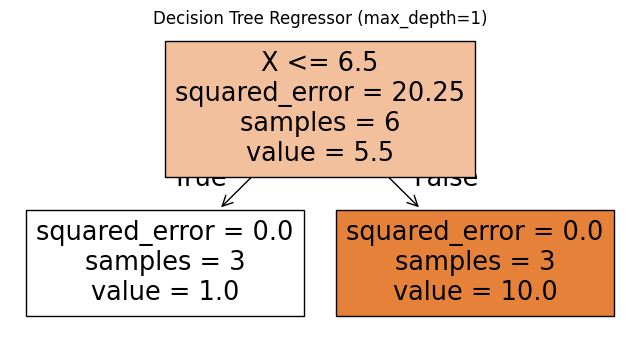

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = np.array([[1], [2], [3], [10], [11], [12]])
y = np.array([1, 1, 1, 10, 10, 10])

reg = DecisionTreeRegressor(max_depth=1, random_state=0)
reg.fit(X, y)

threshold = reg.tree_.threshold[0]
feature_index = reg.tree_.feature[0]
print(f"Split chosen by DecisionTreeRegressor: Feature {feature_index}, Threshold {threshold}")

plt.figure(figsize=(8, 4))
plot_tree(reg, feature_names=["X"], filled=True)
plt.title("Decision Tree Regressor (max_depth=1)")
plt.show()


In [4]:

thresholds = [(X[i] + X[i+1]) / 2 for i in range(len(X) - 1)]

def rss(y_vals):
    if len(y_vals) == 0:
        return 0
    mean_val = np.mean(y_vals)
    return np.sum((y_vals - mean_val) ** 2)

parent_rss = rss(y)

results = []

for t in thresholds:
    left_mask = X.flatten() < t
    right_mask = ~left_mask
    y_left = y[left_mask]
    y_right = y[right_mask]

    left_rss = rss(y_left)
    right_rss = rss(y_right)
    total_rss = left_rss + right_rss
    gain = parent_rss - total_rss

    results.append({
        "Threshold": t,
        "Left RSS": left_rss,
        "Right RSS": right_rss,
        "Total Child RSS": total_rss,
        "RSS Gain": gain
    })

results_df = pd.DataFrame(results).sort_values("Total Child RSS")
print("\nManual Split Evaluation:")
print(results_df.to_string(index=False))



Manual Split Evaluation:
Threshold  Left RSS  Right RSS  Total Child RSS  RSS Gain
    [6.5]      0.00       0.00             0.00    121.50
    [2.5]      0.00      60.75            60.75     60.75
   [10.5]     60.75       0.00            60.75     60.75
    [1.5]      0.00      97.20            97.20     24.30
   [11.5]     97.20       0.00            97.20     24.30
